# **DecisionTree Assignment**

# **Assignment 14(a)**

# ***1.Company_Data DataSet(Company_Data.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
com_df=pd.read_csv('/content/Company_Data.csv')
com_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **Exploratory Data Analysis**

In [3]:
com_df.shape

(400, 11)

In [4]:
#checking missing values
(com_df.isna().sum())/len(com_df)*100

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

In [5]:
com_df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
#checking duplicates
com_df.duplicated().sum()

0

In [7]:
com_df[com_df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
com_df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
com_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
com_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
com_df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [13]:
com_df['ShelveLoc'].nunique()

3

In [14]:
com_df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [15]:
com_df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [16]:
com_df.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

# **Correlation**

In [17]:
#now check corrlation
com_df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [18]:
com_df.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [19]:
#as in our dataset we have 3 features as objects, so we have to convert into in numerics because machine learning understand
#only numeric data

# **Label Encoding**

In [20]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
com_df[['ShelveLoc','Urban','US']]=com_df[['ShelveLoc','Urban','US']].apply(le.fit_transform)

In [22]:
com_df['ShelveLoc'].unique()

array([0, 1, 2])

In [23]:
com_df['Urban'].unique()

array([1, 0])

In [24]:
com_df['US'].unique()

array([1, 0])

In [25]:
com_df['ShelveLoc']=com_df['ShelveLoc'].astype('category')
com_df['Urban']=com_df['Urban'].astype('category')
com_df['US']=com_df['US'].astype('category')

In [26]:
com_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [27]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


# **Visualization**

# **Heatmap**

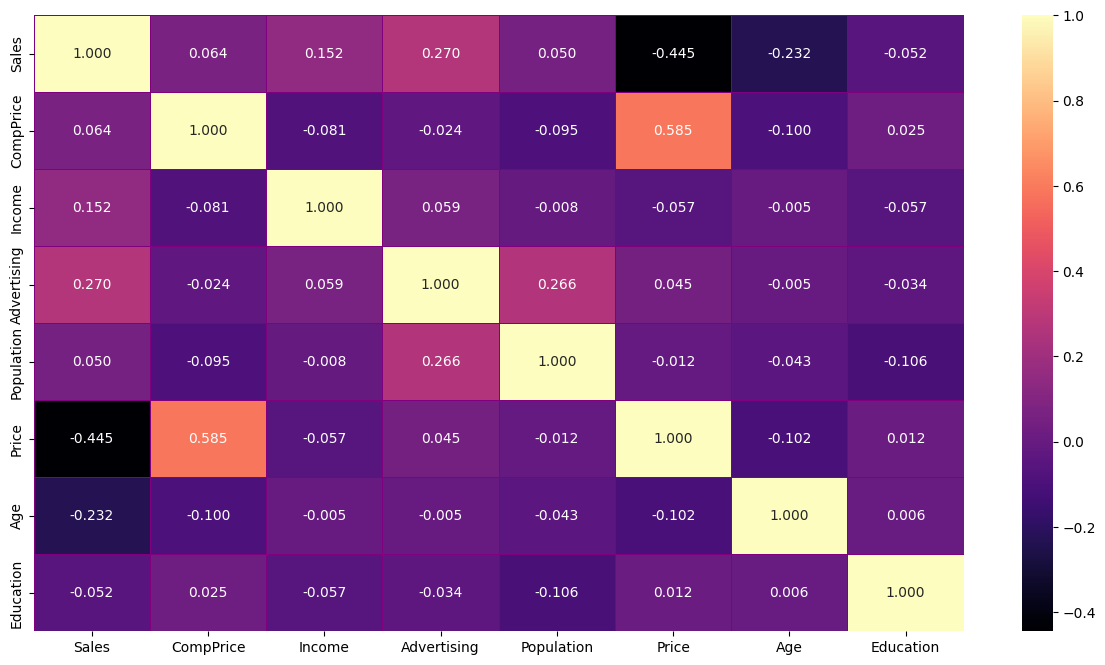

In [28]:
#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(com_df.corr(),annot=True,cmap='magma',fmt='.3f',linewidth=0.6,linecolor='purple',linewidths=0.6)
plt.show()

# **PairPlot**

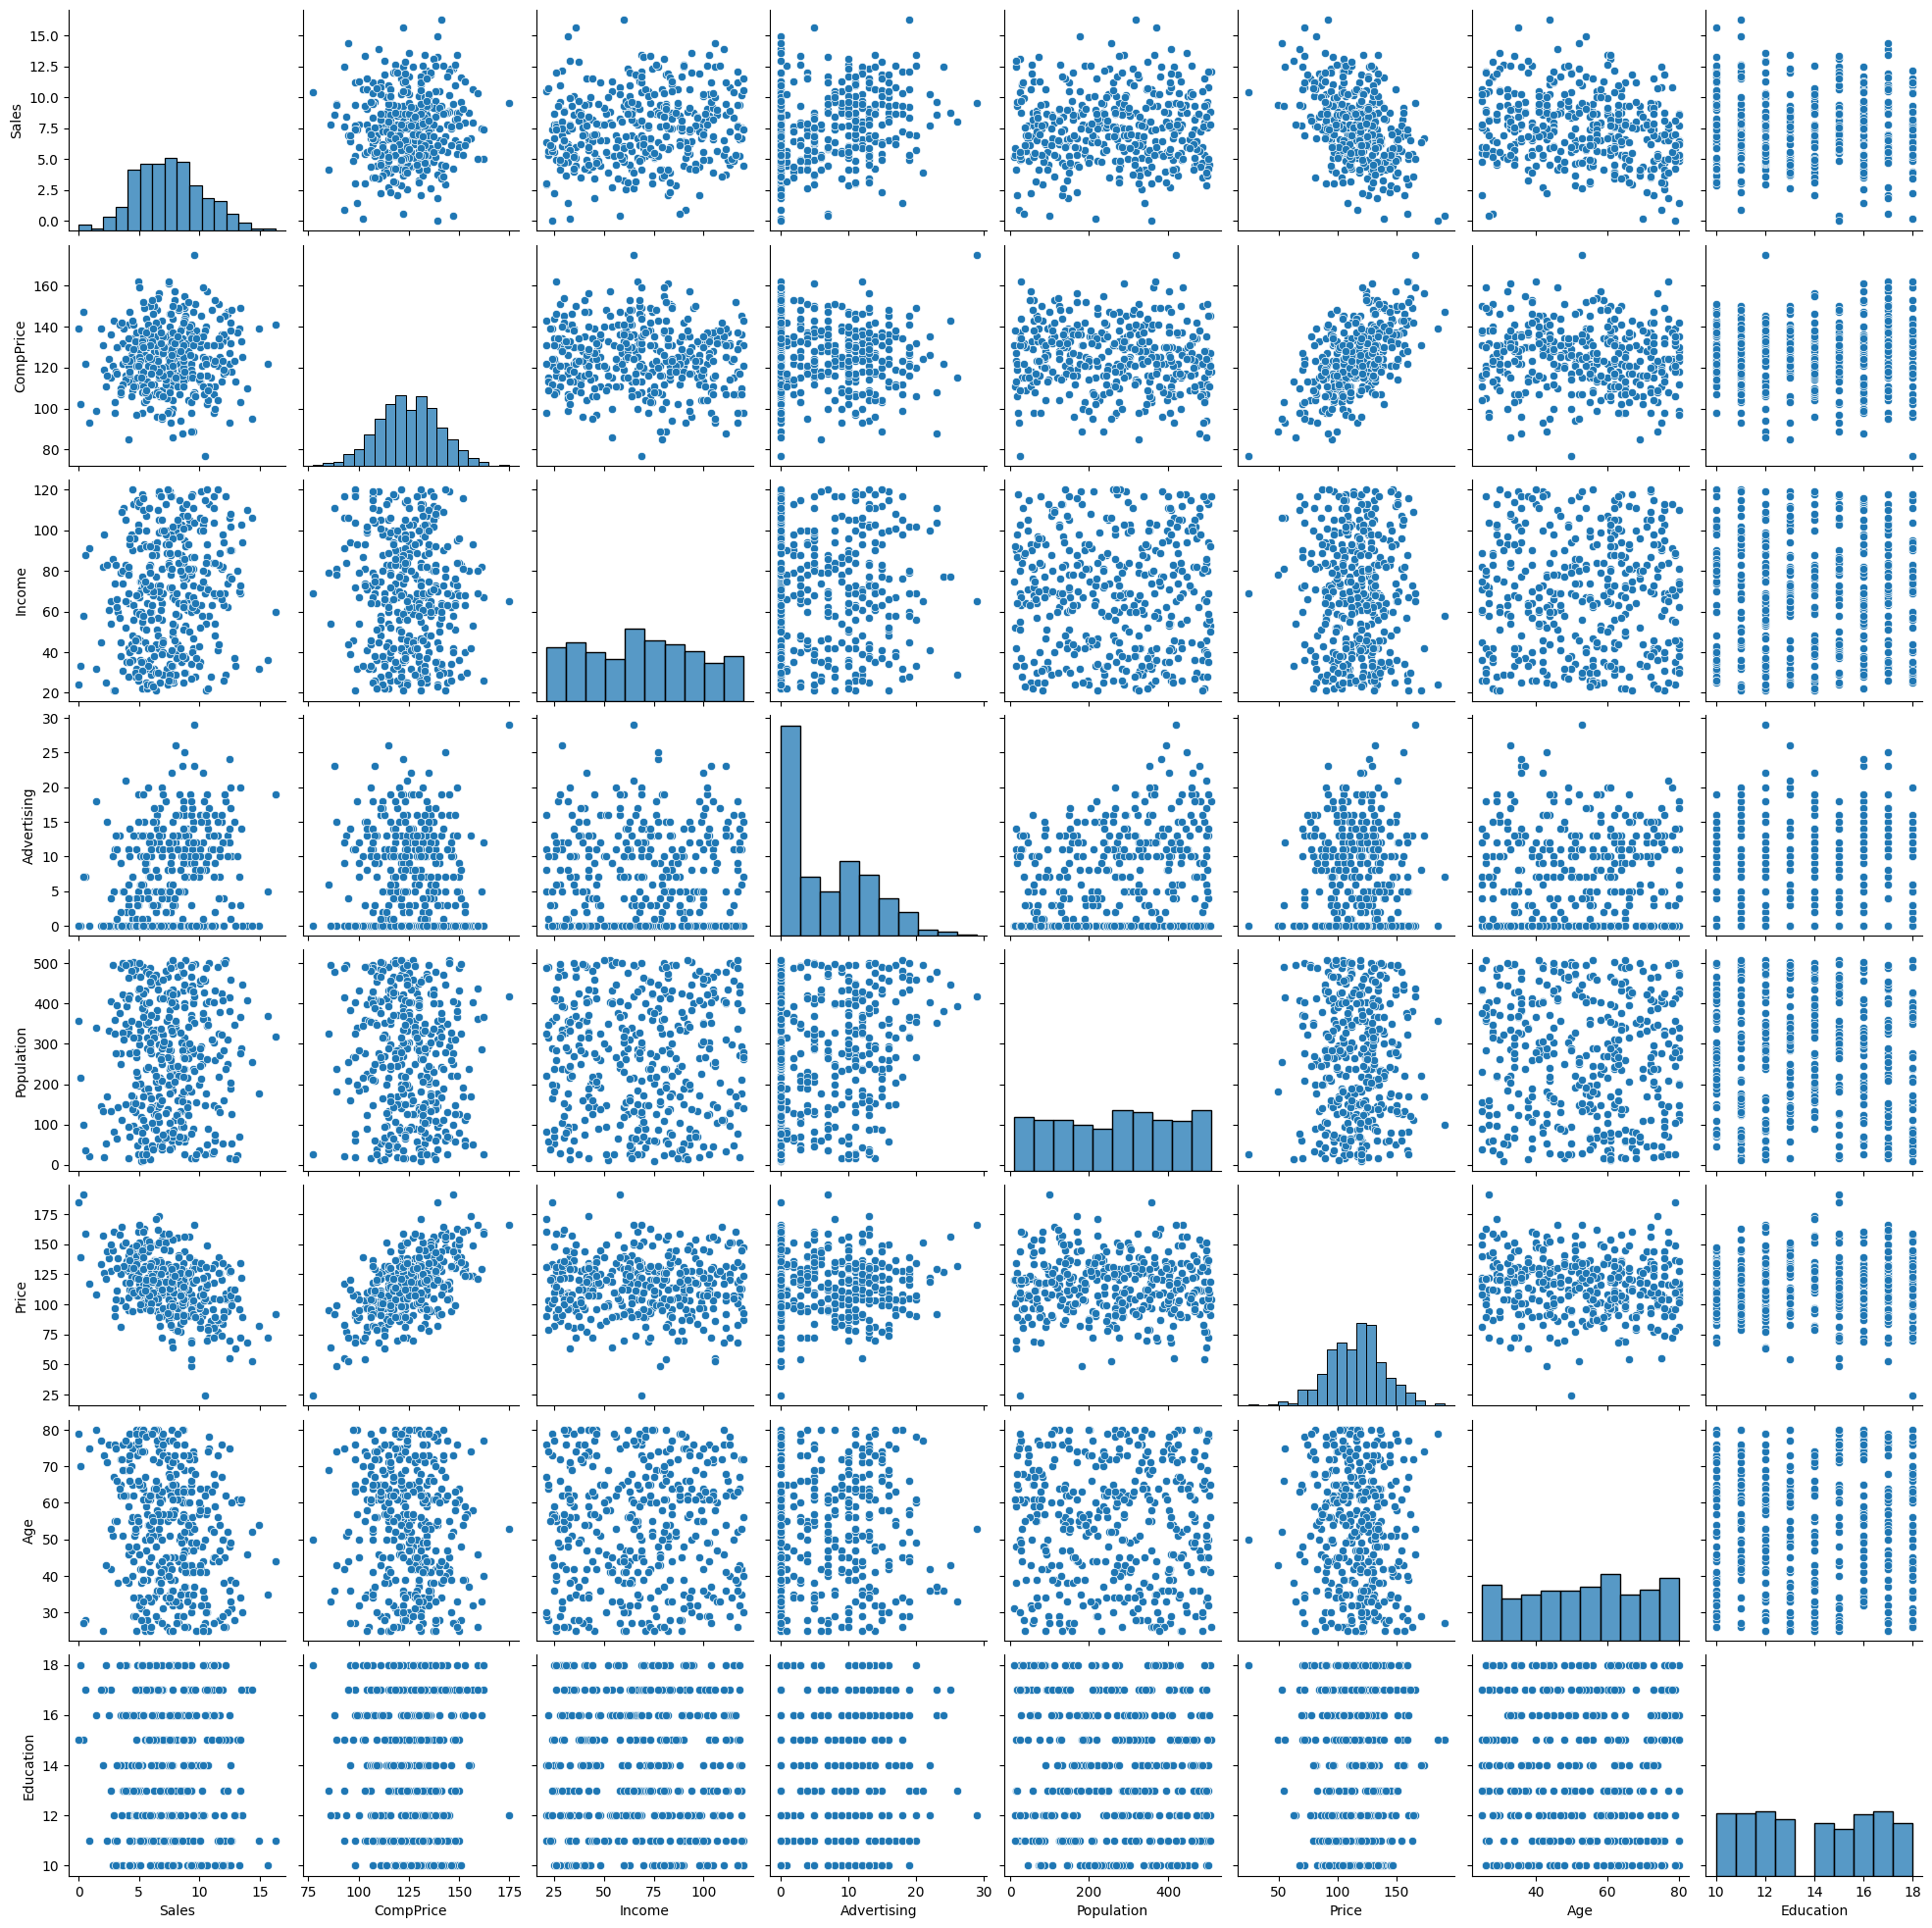

In [29]:
#pairplot
sns.pairplot(com_df)

# **RegressionPlot**

<Axes: xlabel='Sales', ylabel='Income'>

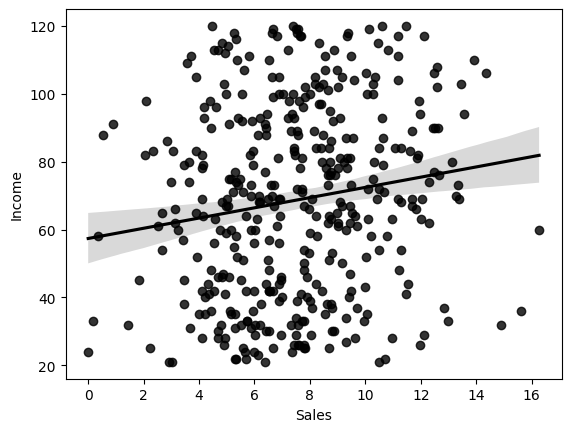

In [30]:
#regression plot
sns.regplot(x='Sales',y='Income',data=com_df,color='black')

<Axes: >

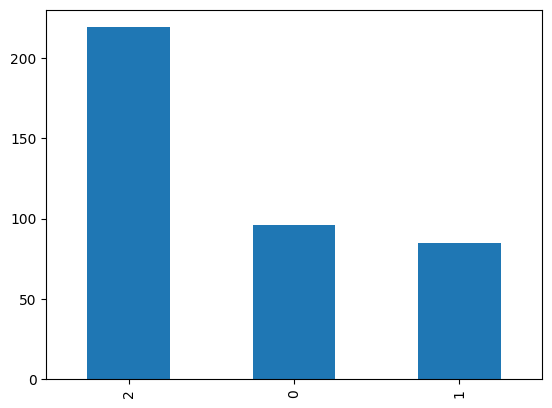

In [31]:
#barplot
com_df['ShelveLoc'].value_counts().plot(kind='bar')

# **Histogram**

<Axes: xlabel='ShelveLoc', ylabel='Count'>

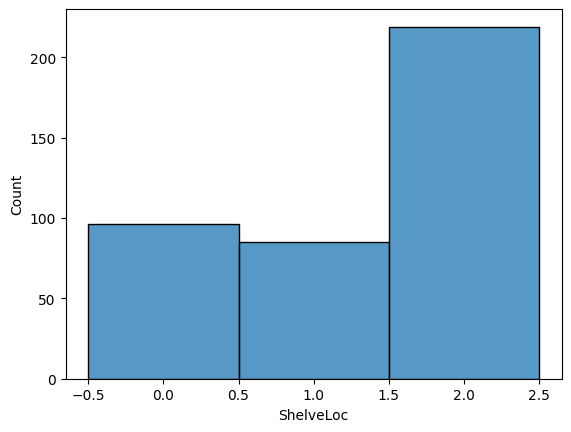

In [32]:
#histogram
sns.histplot(com_df['ShelveLoc'])

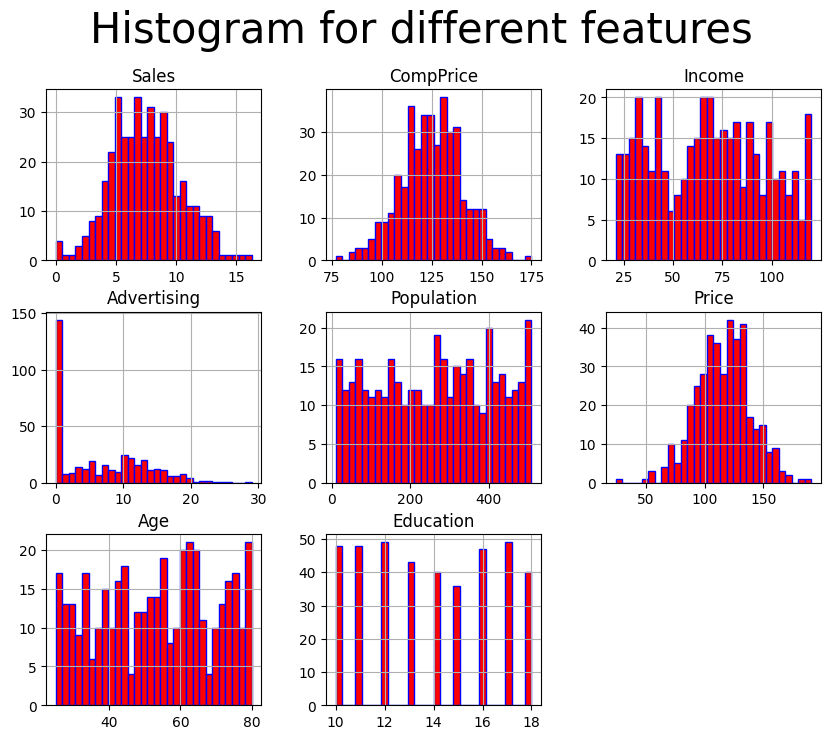

In [33]:
com_df.hist(bins=30,figsize=(10,8),color='red',edgecolor='blue')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

# **Density Plot**

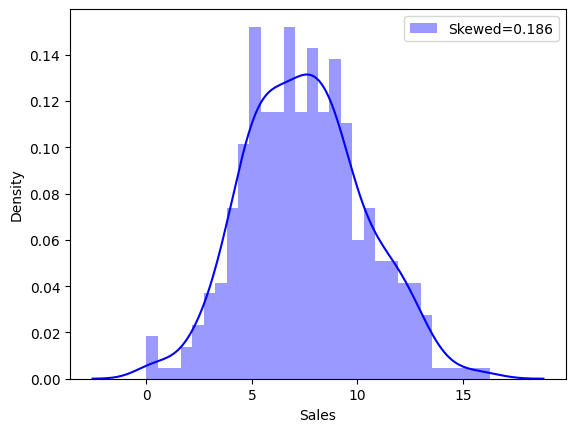

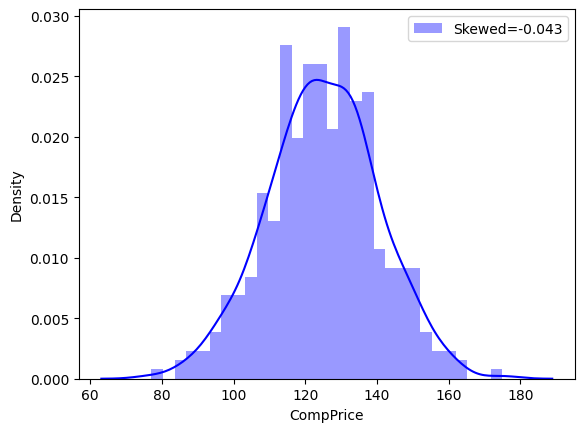

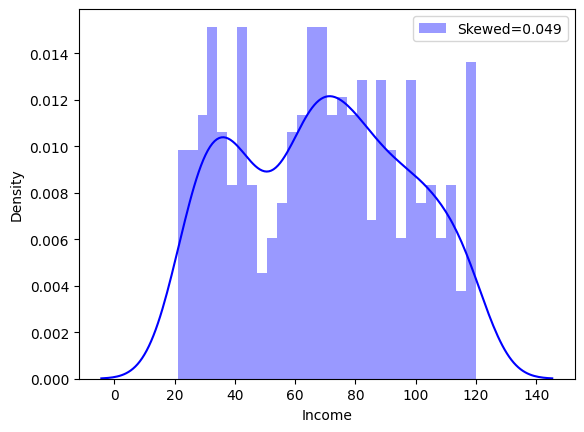

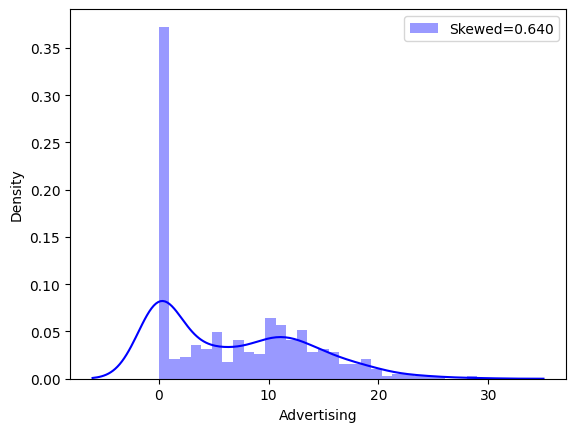

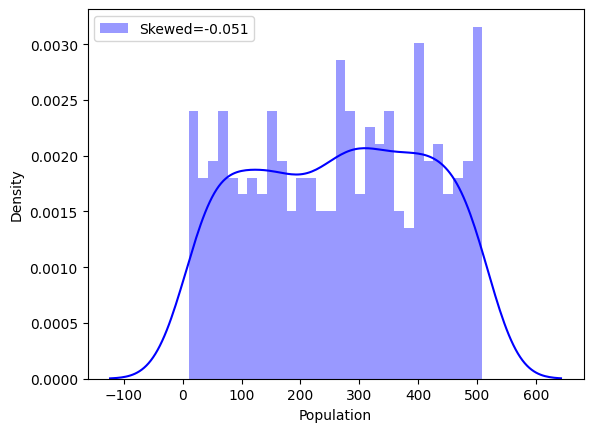

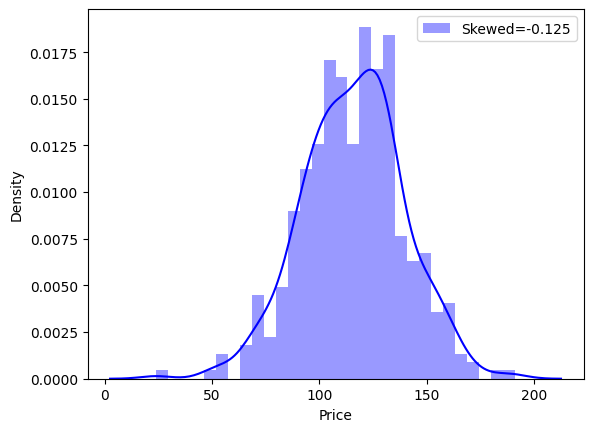

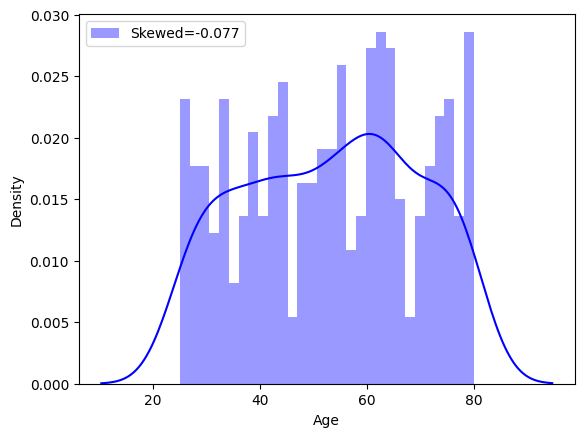

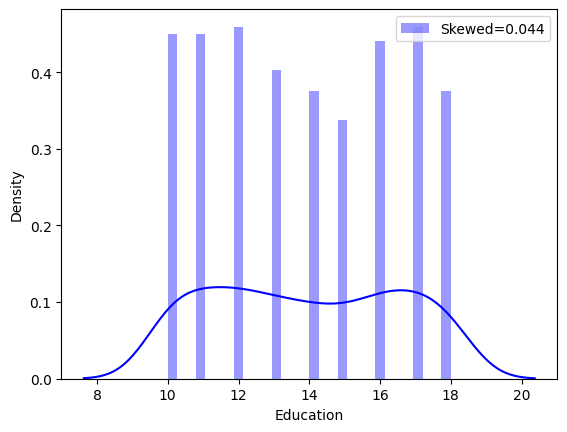

In [34]:
#univariate plot
feat=com_df.drop(['ShelveLoc','US','Urban'],axis=1)
for f in feat:
  skew=com_df[f].skew()
  sns.distplot(com_df[f],label='Skewed=%.3f'%(skew),bins=30,color='blue')
  plt.legend()
  plt.show()

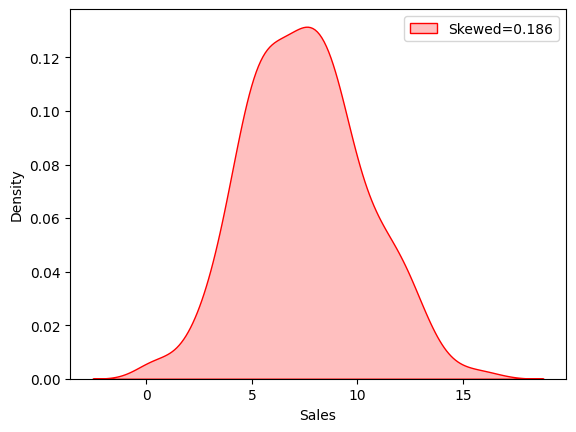

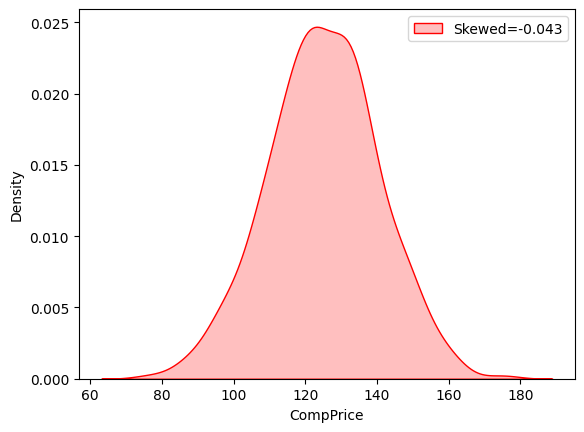

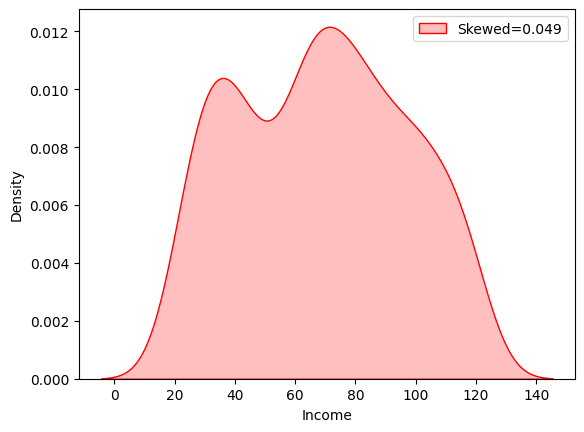

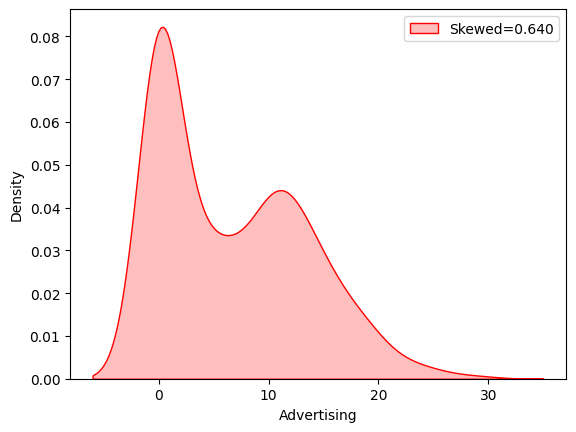

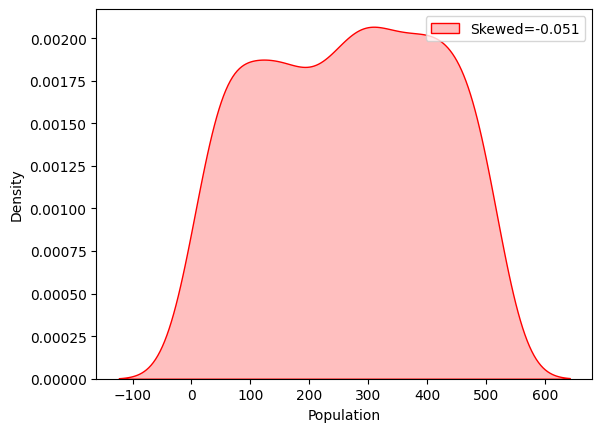

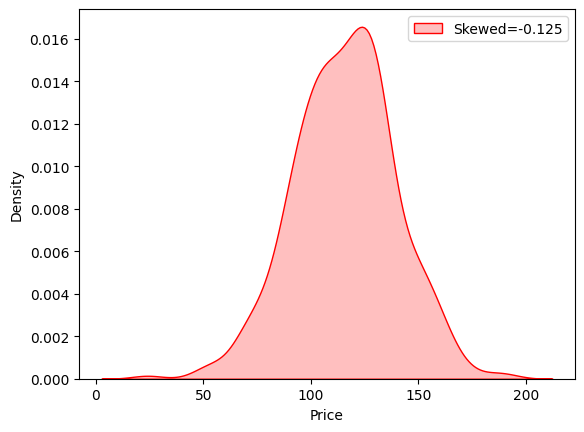

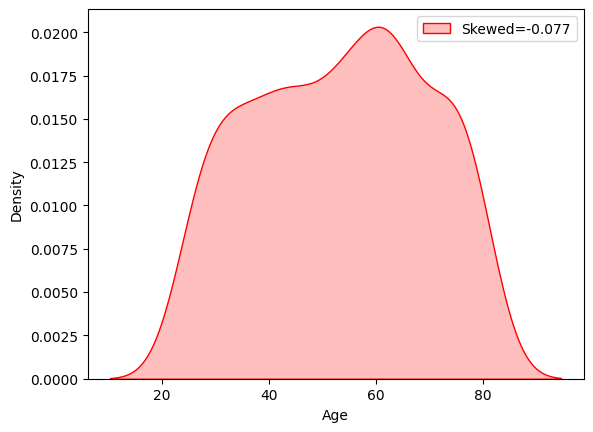

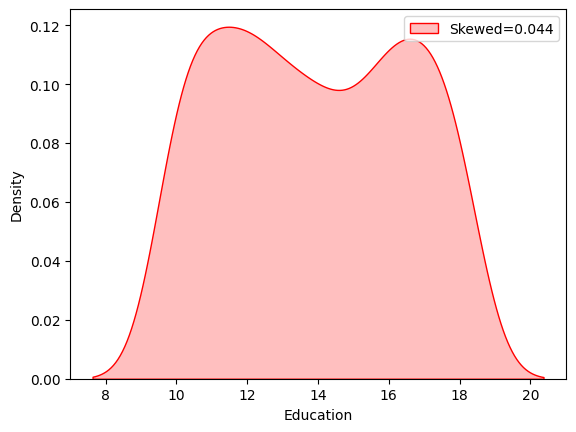

In [35]:
#univariate kdeplot
feat=com_df.drop(['ShelveLoc','US','Urban'],axis=1)
for f in feat:
  skew=com_df[f].skew()
  sns.kdeplot(com_df[f],label='Skewed=%.3f'%(skew),color='red',shade='True')
  plt.legend()
  plt.show()

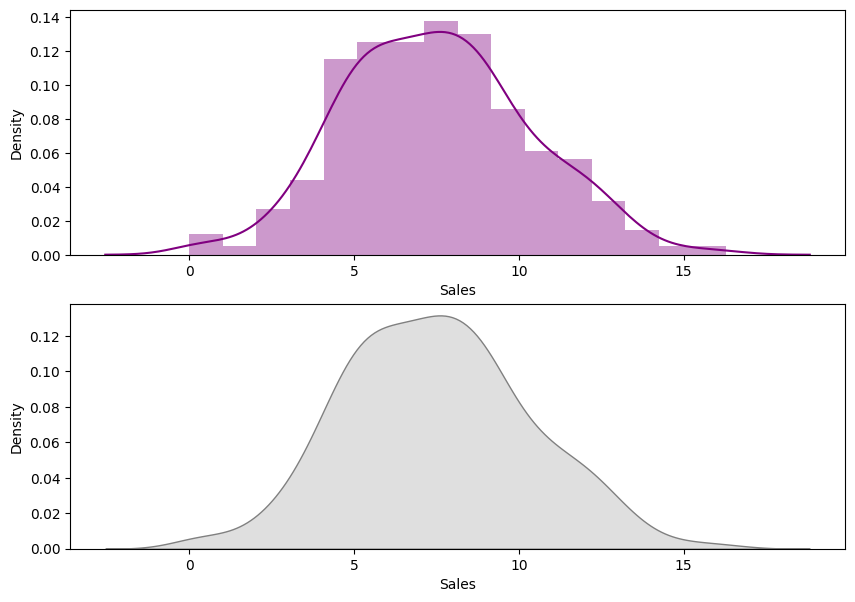

In [36]:
#distplot and kdeplot for Sales
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.distplot(com_df['Sales'],color='purple')
plt.subplot(212)
sns.kdeplot(com_df['Sales'],color='gray',shade=True)
plt.show()

# **Boxplot**

<Axes: >

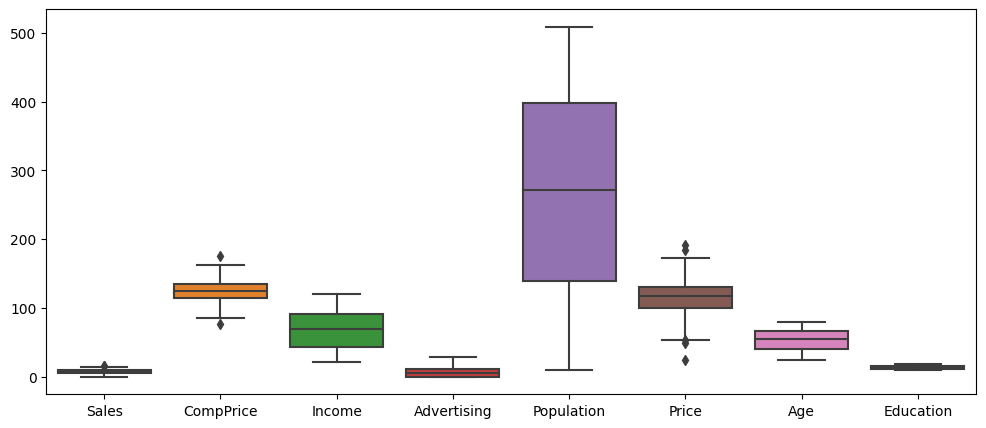

In [37]:
#boxplot for all features
plt.figure(figsize=(12,5))
sns.boxplot(com_df)

<Axes: >

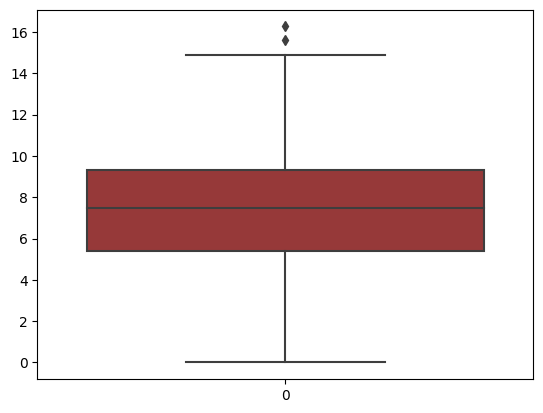

In [38]:
#boxplot for sales
sns.boxplot(com_df['Sales'],color='brown')

# **Building Decision Tree Models**

# **Spliting into Training and Testing**

In [39]:
#first we have to split it into independent feature(x) and dependent feature(y)

In [40]:
#here 'ShelveLoc' is the dependent feature(y)

In [41]:
x=com_df.drop('ShelveLoc',axis=1) #independent feature
y=com_df['ShelveLoc']             #dependent feature

In [42]:
#now spliting into training and testing part

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=40)

In [45]:
xtrain

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
189,12.11,118,117,18,509,104,26,15,0,1
396,6.14,139,23,3,37,120,55,11,0,1
299,9.40,135,40,17,497,96,54,17,0,1
347,6.88,96,39,0,161,112,27,14,0,0
282,7.74,150,96,0,80,154,61,11,1,0
...,...,...,...,...,...,...,...,...,...,...
306,4.78,131,32,1,85,133,48,12,1,1
165,0.37,147,58,7,100,191,27,15,1,1
7,11.85,136,81,15,425,120,67,10,1,1
219,10.62,116,79,19,359,116,58,17,1,1


In [46]:
ytrain

189    2
396    2
299    2
347    1
282    1
      ..
306    2
165    0
7      1
219    1
326    2
Name: ShelveLoc, Length: 300, dtype: category
Categories (3, int64): [0, 1, 2]

In [47]:
xtest

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
132,9.54,125,87,9,232,136,72,10,1,1
390,5.47,108,75,9,61,111,67,12,1,1
310,9.53,175,65,29,419,166,53,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
248,5.36,111,52,0,12,101,61,11,1,1
...,...,...,...,...,...,...,...,...,...,...
27,5.27,98,118,0,19,107,64,17,1,0
183,5.32,118,74,6,426,102,80,18,1,1
157,10.21,121,58,8,249,90,48,13,0,1
129,4.47,143,120,7,279,147,40,10,0,1


In [48]:
ytest

132    1
390    2
310    2
3      2
248    2
      ..
27     2
183    2
157    2
129    0
279    2
Name: ShelveLoc, Length: 100, dtype: category
Categories (3, int64): [0, 1, 2]

In [49]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(300, 10)
(300,)
(100, 10)
(100,)


# **Decision Model on Entropy Criteria**

In [50]:
#now building the model on entropy criteria

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [53]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
#now prediction
ypred=model.predict(xtest)
pd.Series(ypred).value_counts()

2    77
1    15
0     8
dtype: int64

In [55]:
#accuracy
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.38      0.15      0.21        20
           1       0.67      0.50      0.57        20
           2       0.65      0.83      0.73        60

    accuracy                           0.63       100
   macro avg       0.56      0.49      0.51       100
weighted avg       0.60      0.63      0.60       100



In [56]:
#accuracy is 63%

In [57]:
#accuracy of only training data
model.score(xtrain,ytrain)

0.6466666666666666

In [58]:
#accuracy of only testing data
model.score(xtest,ytest)

0.63

**Accuracy:63%**

In [59]:
#ploting of tree diagram

In [60]:
from sklearn import tree

In [61]:
fn=x.columns
cn=['0','1','2']

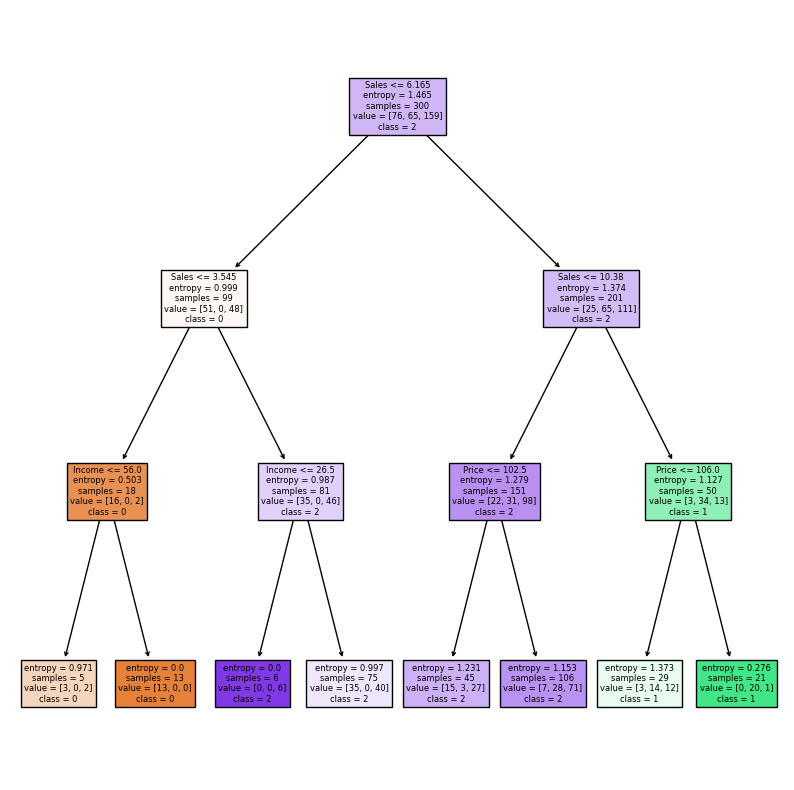

In [62]:
#tree plot
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [63]:
#Final Accuracy for Entropy Criteria is 63%

# **Decision Model on Gini Criteria**

In [64]:
#for gini criteria

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [67]:
#prediction
ypred_gini=model_gini.predict(xtest)
pd.Series(ypred_gini).value_counts()

2    65
0    27
1     8
dtype: int64

In [68]:
#accuracy
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_gini))

              precision    recall  f1-score   support

           0       0.30      0.40      0.34        20
           1       0.62      0.25      0.36        20
           2       0.62      0.67      0.64        60

    accuracy                           0.53       100
   macro avg       0.51      0.44      0.45       100
weighted avg       0.55      0.53      0.52       100



In [69]:
#accuracy is 53%

**Accuracy is 53%**

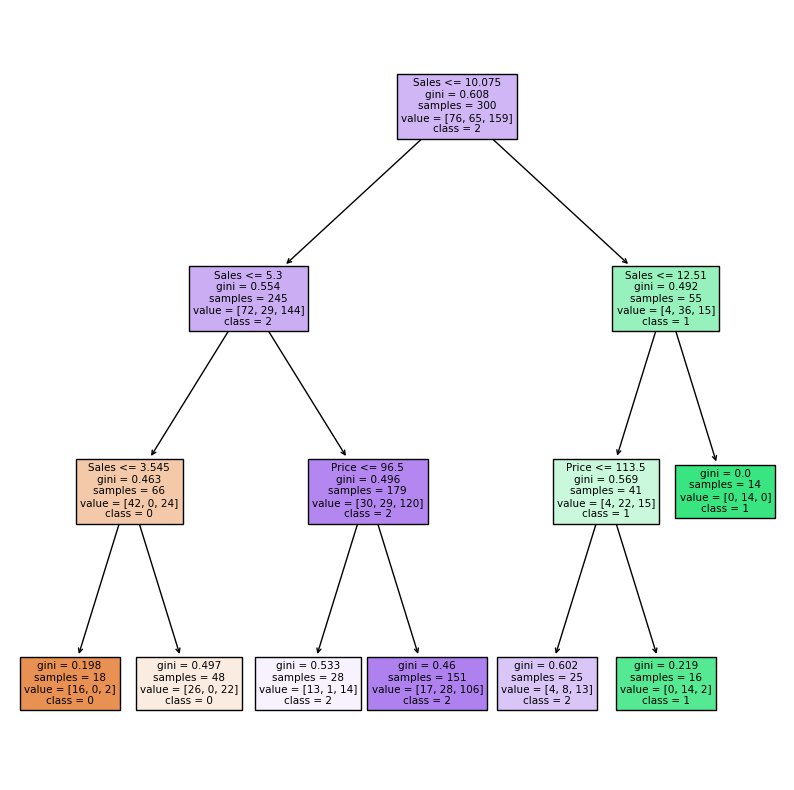

In [70]:
#tree plot
plt.figure(figsize=(10,10))
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [71]:
#Final Accuracy for Gini Criteria is 53%

# **Decision Model Regressor**

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
model_ress=DecisionTreeRegressor(max_depth=3)
model_ress.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3)

In [74]:
#prediction
ypred_ress=model_ress.predict(xtest)
pd.Series(np.round(ypred_ress,0))

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
     ... 
95    1.0
96    2.0
97    1.0
98    1.0
99    0.0
Length: 100, dtype: float64

In [75]:
ytest

132    1
390    2
310    2
3      2
248    2
      ..
27     2
183    2
157    2
129    0
279    2
Name: ShelveLoc, Length: 100, dtype: category
Categories (3, int64): [0, 1, 2]

In [76]:
#accuracy
from sklearn.metrics import r2_score
r2_score(ytest,ypred_ress)

-0.33468268544105495

# **Conclusion**

In [77]:
#We can conclude that,Best Model we are getting from Decision Tree Model with Entropy Criteria ,
#with accuracy of 0.63 i.e 63%

In [78]:
#completed///

# **completed**